In [12]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [13]:
load('sample74.model.gene.rda')

In [14]:
library(dplyr)

In [15]:
cli74 = read.table('./sample74.cli.txt',header =T,sep = '\t') 

In [16]:
da2 = da2 %>% dplyr::filter(sample %in% cli74$sample)

In [17]:
dim(da2)

[1] 73  5

In [18]:
head(cli74,4)

,group,sample,gender,SBP,DBP,age,BMI,Hb,RBC,WBC,...,UA,GLU,TG,TC,HDL.c,LDL.C,ApoA,ApoB,LP,HCY
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,CI,CI2,1,NA,NA,52,43.02772,164,5.16,6.79,...,226,4.9,2.2,4.59,1.52,1.98,1.55,0.70,NA,11.4
2,CI,CI3,1,NA,NA,61,51.90311,NA,NA,NA,...,264,4.3,1.0,3.57,0.90,1.80,0.98,0.62,NA,14.7
3,CI,CI4,2,140,90,51,28.51562,119,4.11,9.91,...,175,7.2,1.7,6.58,1.21,3.75,1.25,1.19,NA,10.0
4,CI,CI5,1,NA,NA,63,27.54821,123,4.11,4.35,...,320,9.4,1.3,3.25,0.79,1.50,1.03,0.61,NA,10.6


In [19]:
dim(cli74)

[1] 73 27

In [ ]:
da3 = merge(da2,cli74,by = 'sample')

data = da3[,c('group','gender','age','BMI','FAM200B','BCL2A1','IGJ','TXN')]

In [24]:
head(data,2)

,group,gender,age,BMI,FAM200B,BCL2A1,IGJ,TXN
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CTR,1,54,21.45329,5.615827,28.66226,37.85341,10.132857
2,CTR,1,56,25.76298,4.886505,22.32717,21.40125,7.655688


In [27]:
data$group = ifelse(data$group == 'CTR',0,1)

In [32]:
fold_pre <- glm(group~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

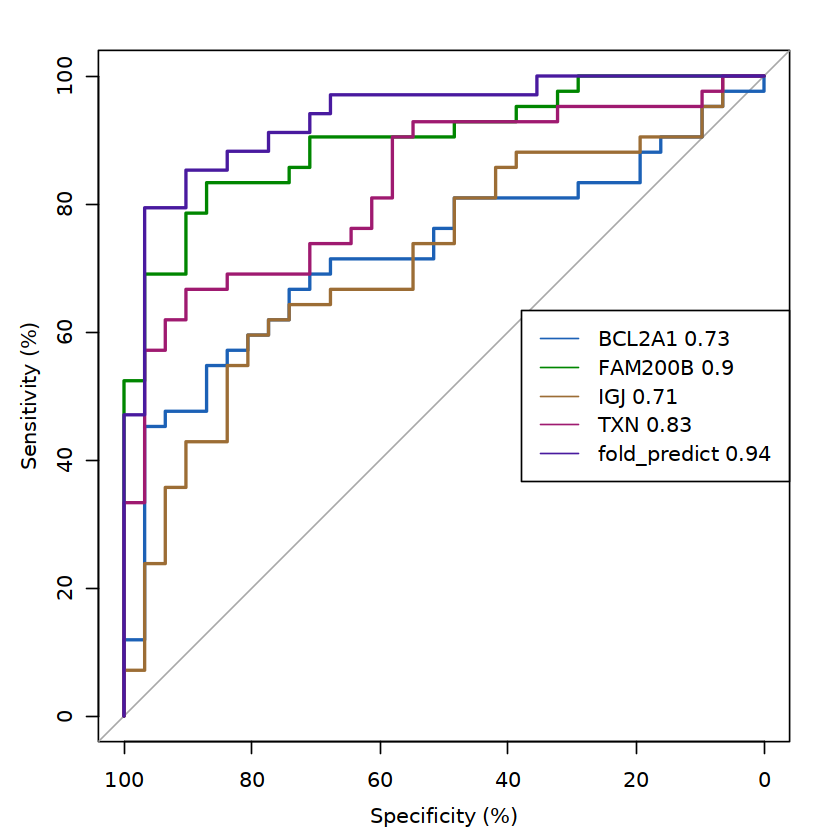

In [33]:
rocobj1 <- plot.roc(data$group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)

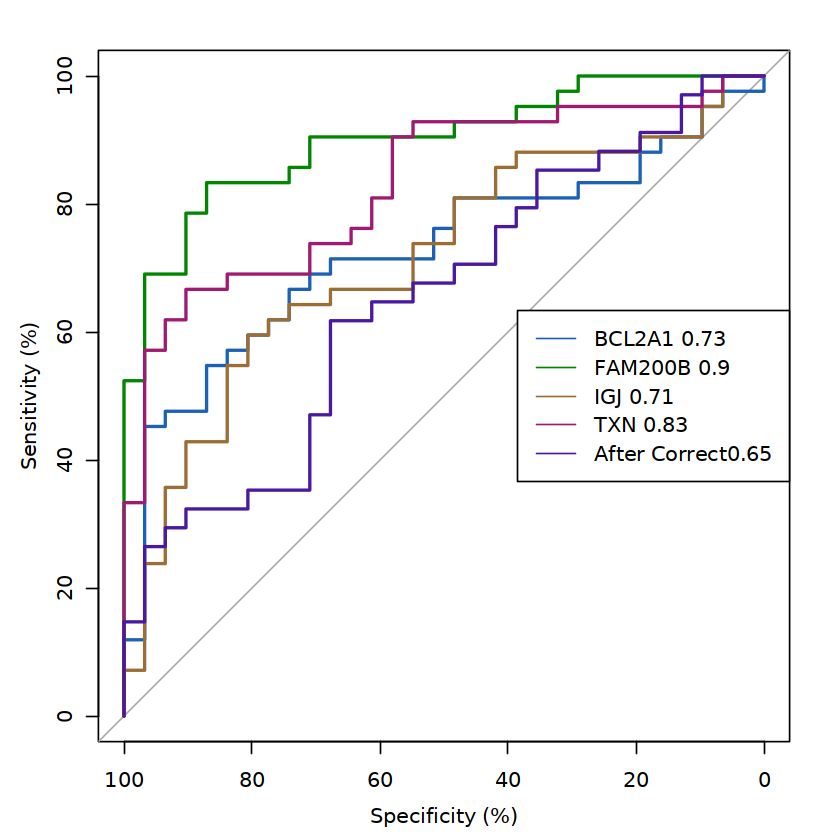

In [51]:
fold_pre <- glm(group~gender+age+BMI,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

library(pROC)

rocobj1 <- plot.roc(data$group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("After Correct", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)

In [56]:
pdf('./fig/ROC-train-QC.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$group,fold_predict,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
legend("right", legend="AUC of After Correct: 0.65", col=c("#1c61b6"))
dev.off()

png 
  2

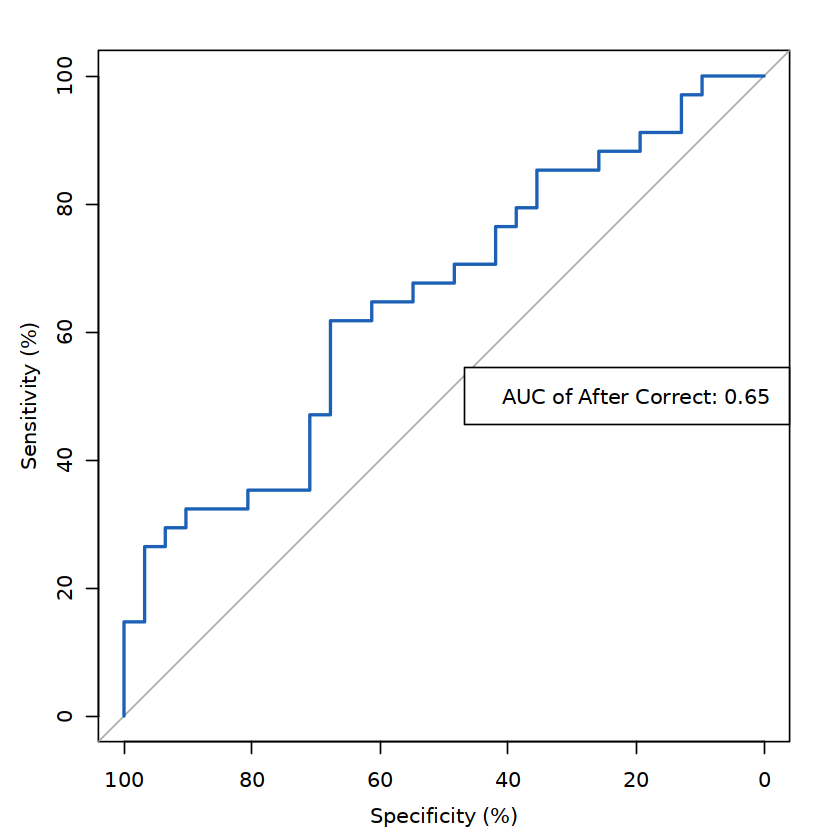

In [57]:
rocobj1 <- plot.roc(data$group,fold_predict,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
legend("right", legend="AUC of After Correct: 0.65", col=c("#1c61b6"))